In [1]:
#%xmode Verbose

In [2]:
import sys
sys.path.append("../libs/")

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from utils import shift_join_data,plot_pred, plot_history,rmse
from keras.models import load_model
import datetime
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [4]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=50,restore_best_weights=True)

# Carga de datos

In [5]:
df = pd.read_csv('../data/wb_dataset_prep.csv')
df = df.drop('country',axis=1)
iso = df['iso'].unique()    #Codigos de paises
df = df.set_index(['iso','year'])

Paises

In [6]:
print(iso)

['DEU' 'AUS' 'AUT' 'BGD' 'BEL' 'BOL' 'BRA' 'CAN' 'CHL' 'CHN' 'COL' 'CRI'
 'HRV' 'DNK' 'ECU' 'SLV' 'ESP' 'USA' 'EST' 'RUS' 'FIN' 'FRA' 'GRC' 'GTM'
 'HND' 'HUN' 'IND' 'IDN' 'IRL' 'ISL' 'ISR' 'ITA' 'JPN' 'JOR' 'KEN' 'LTU'
 'LUX' 'MYS' 'MLT' 'MAR' 'MEX' 'NGA' 'NOR' 'NLD' 'PAK' 'PAN' 'PRY' 'PER'
 'POL' 'PRT' 'GBR' 'EGY' 'KOR' 'ROU' 'SWE' 'CHE' 'TUR' 'URY' 'NZL']


Features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2444 entries, ('DEU', 1983) to ('NZL', 2021)
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   trade        2444 non-null   float64
 1   exports      2444 non-null   float64
 2   imports      2444 non-null   float64
 3   ggfce        2444 non-null   float64
 4   gfcf         2444 non-null   float64
 5   unempl       2444 non-null   float64
 6   rgdp_growth  2444 non-null   float64
 7   infl_cpi     2444 non-null   float64
 8   oil          2444 non-null   float64
 9   gold         2444 non-null   float64
 10  copper       2444 non-null   float64
 11  sp500        2444 non-null   float64
dtypes: float64(12)
memory usage: 239.0+ KB


# Dividir Datos

In [8]:
iso_train = ['PER']
target_col = ['rgdp_growth']
features = df.columns[(df.columns!=target_col[0])]

Países de Entrenamiento

In [9]:
print(iso_train)

['PER']


Features de Entrenamiento

In [10]:
print(features)

Index(['trade', 'exports', 'imports', 'ggfce', 'gfcf', 'unempl', 'infl_cpi',
       'oil', 'gold', 'copper', 'sp500'],
      dtype='object')


# Normalizar

In [11]:
df_x = df.loc[iso_train][features].copy()
df_y = df.loc[iso_train][target_col].copy()

std_scaler_x = StandardScaler()
std_scaler_y = StandardScaler()

df_x.iloc[:,:] = std_scaler_x.fit_transform(df_x)
df_y.iloc[:,:] = std_scaler_y.fit_transform(df_y)

df_x.iloc[:,:] = np.clip(df_x,-3,3)
df_y.iloc[:,:] = np.clip(df_y,-3,3)

# Generar variables lag y horizonte

In [12]:
n_steps_in = 10
n_steps_out = 3
n_features = len(features)

x, y = shift_join_data(df_x,df_y,iso_train,n_steps_in,n_steps_out)

x_train, y_train = x[:-int(len(x)*0.2)], y[:-int(len(y)*0.2)]
x_test, y_test = x[- int(len(x)*0.2):], y[- int(len(y)*0.2):]


# Prediccion

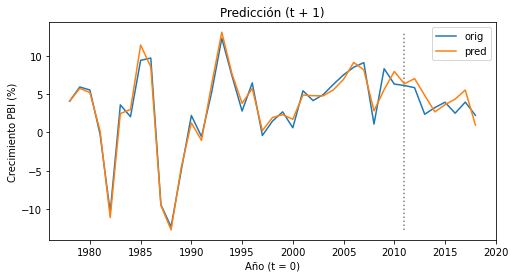

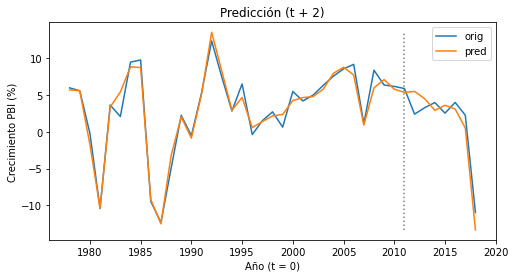

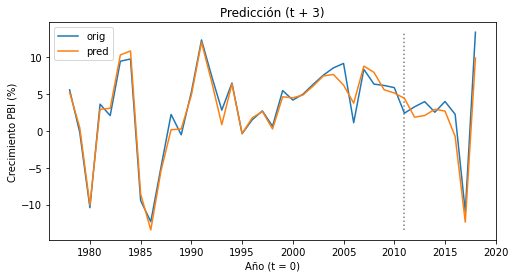

In [13]:
model = load_model('resultados/MLP_TR_20220801_2251_94.h5')
y_pred = model(x)
dn_y = std_scaler_y.inverse_transform(y)
dn_y_pred = std_scaler_y.inverse_transform(y_pred)
plot_pred(dn_y, dn_y_pred,2021,2011)

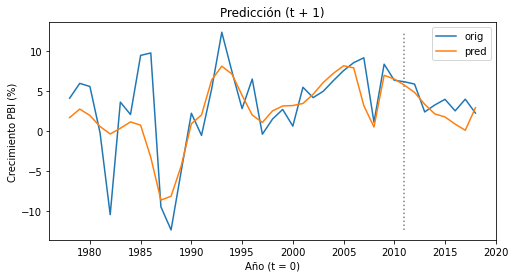

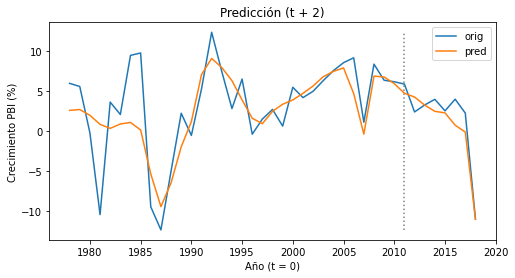

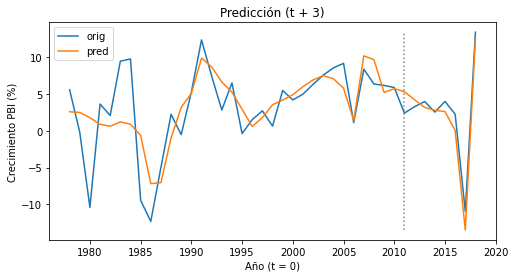

In [14]:
model = load_model('resultados/GRU_TR_20220802_1221_24.h5')
y_pred = model(x)
dn_y = std_scaler_y.inverse_transform(y)
dn_y_pred = std_scaler_y.inverse_transform(y_pred)
plot_pred(dn_y, dn_y_pred,2021,2011)

In [15]:
# from notifications import enviar_correo
# enviar_correo("Evaluacion Finalizado!","Se ha completado: {}".format(res_name))